## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
#Notes for Jess: mouse_metadata does not have any duplicates. 
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Select all duplicate rows based on one column
#duplicateRowsDF = study_results[study_results.duplicated(['Mouse ID'])]
#print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')
#duplicateRowsDF2 = mouse_metadata[mouse_metadata.duplicated(['Mouse ID'])]
#print("Duplicate Rows based on a single column are:", duplicateRowsDF2, sep='\n')

# Combine the data into a single dataset(DIRECTIONS FROM HOMEWORK)
merged_mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")
merged_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
number_of_mice = merged_mouse_df['Mouse ID'].nunique()
number_of_mice 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#time_group=  merged_mouse_df.groupby(['Mouse ID' , 'Timepoint'])

duplicated_df= merged_mouse_df[merged_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_df

#mouse_df_clean = merged_mouse_df[merged_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#merged_mouse_df.set_index('Mouse ID', inplace=True)
#merged_mouse_df.drop('g989', inplace=True)
#merged_mouse_df.reset_index(inplace=True)
#merged_mouse_df

clean_df = merged_mouse_df.drop(duplicated_df.index)

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

regime_group = clean_df.groupby('Drug Regimen')
regime_group

mean = regime_group['Tumor Volume (mm3)'].mean()
median = regime_group['Tumor Volume (mm3)'].median()
variance = regime_group['Tumor Volume (mm3)'].var()
std = regime_group['Tumor Volume (mm3)'].std()
SEM =regime_group['Tumor Volume (mm3)'].sem()


summary_stats ={"Mean":mean,
                    "Median": median,
                    "Variance": variance,
                    "Standard Deviation": std,
                    "Standard Error Mean": SEM,
            }  

summary_stats_df = pd.DataFrame(summary_stats)

summary_stats_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

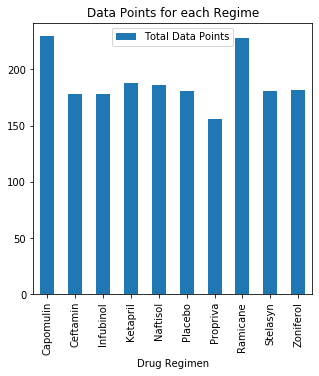

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summary_stats_df["Total Data Points"] = regime_group['Drug Regimen'].count()
drugs_and_tot_points = summary_stats_df[['Total Data Points']]
drugs_and_tot_points.plot(kind="bar", figsize=(5,5))

# Set a title for the chart
plt.title("Data Points for each Regime")
plt.show()
plt.tight_layout()



([<matplotlib.axis.XTick at 0x1a18ca4b10>,
 <a list of 10 Text xticklabel objects>)

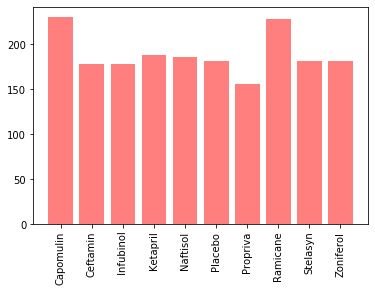

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimes = regime_group['Drug Regimen'].value_counts()
x_axis = np.arange(len(regimes))
plt.bar(x_axis, regimes, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", " Infubinol", "Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation="vertical")

## Pie Plots

Text(0.5, 1.0, 'Male vs Female Mouse Population')

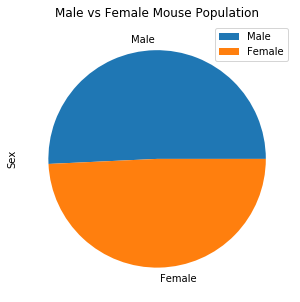

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = clean_df['Sex'].value_counts().to_frame()
plot_pie = gender_df.plot(kind = 'pie', y='Sex', figsize=(5, 5))
plt.title('Male vs Female Mouse Population')



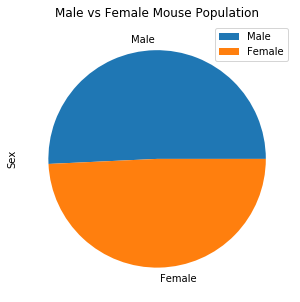

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = clean_df['Sex'].value_counts().to_frame()
plot = gender_df.plot.pie(y='Sex', figsize=(5, 5))
plt.title('Male vs Female Mouse Population')

plot

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
most_promising_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | 
                                    (clean_df["Drug Regimen"] == 'Ramicane') |
                                    (clean_df["Drug Regimen"] == 'Propriva') |
                                    (clean_df["Drug Regimen"] == 'Ceftamin'), :]
most_promising_df=most_promising_df.loc[(clean_df["Timepoint"] == 45),:]

#Final Tumor Volume of Each Mouse 
cap_df = most_promising_df.loc[most_promising_df["Drug Regimen"] == "Capomulin", :]
ram_df = most_promising_df.loc[most_promising_df["Drug Regimen"] == 'Ramicane', :]
prop_df = most_promising_df.loc[most_promising_df["Drug Regimen"] == 'Propriva', :]
ceft_df = most_promising_df.loc[most_promising_df["Drug Regimen"] == 'Propriva', :]

#Quartile and Potential outliers  for Capomulin
cap_final_volume = cap_df['Tumor Volume (mm3)']
quartiles = cap_final_volume.quantile([.25,.5,.75])
cap_lowerq = quartiles[0.25]
cap_upperq = quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
print(f'Capomulin IQR:{cap_iqr}')

cap_lower_bound = cap_lowerq- (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin possible outliers: {cap_lower_bound} and {cap_upper_bound}")


#Quartile and Potential outliers  for Ramicane
ram_final_volume = ram_df['Tumor Volume (mm3)']
quartiles = ram_final_volume.quantile([.25,.5,.75])
ram_lowerq = quartiles[0.25]
ram_upperq = quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
print(f'Ramicane IQR:{ram_iqr}')

ram_lower_bound = ram_lowerq- (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane possible outliers: {ram_lower_bound} and {ram_upper_bound}")


#Quartile and Potential outliers  for Propriva
prop_final_volume = prop_df['Tumor Volume (mm3)']
quartiles = prop_final_volume.quantile([.25,.5,.75])
prop_lowerq = quartiles[0.25]
prop_upperq = quartiles[0.75]
prop_iqr = prop_upperq-prop_lowerq
print(f'Propriva IQR: {prop_iqr}')

prop_lower_bound = prop_lowerq- (1.5*prop_iqr)
prop_upper_bound = prop_upperq + (1.5*prop_iqr)
print(f"Propriva possible outliers: {prop_lower_bound} and {prop_upper_bound}")


#Quartile and Potential outliers  for Ceftamin
ceft_final_volume = ceft_df['Tumor Volume (mm3)']
quartiles = ceft_final_volume.quantile([.25,.5,.75])
ceft_lowerq = quartiles[0.25]
ceft_upperq = quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq
print(f'Ceftamin IQR: {ceft_iqr}')

ceft_lower_bound = ceft_lowerq- (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Ceftamin possible outliers: {ceft_lower_bound} and {ceft_upper_bound}")


Capomulin IQR:7.781863460000004
Capomulin possible outliers: 20.70456164999999 and 51.83201549
Ramicane IQR:7.527130082499998
Ramicane possible outliers: 19.690480101250003 and 49.79900043124999
Propriva IQR: 6.778879785000015
Propriva possible outliers: 53.38306884749997 and 80.49858798750003
Ceftamin IQR: 6.778879785000015
Ceftamin possible outliers: 53.38306884749997 and 80.49858798750003


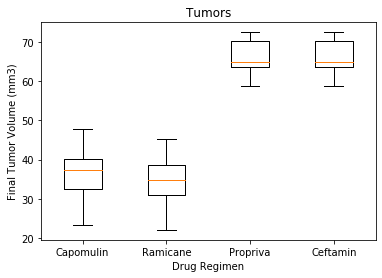

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumors = [cap_final_volume, ram_final_volume, prop_final_volume, ceft_final_volume]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumors, labels=["Capomulin","Ramicane","Propriva","Ceftamin",])

plt.show()

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


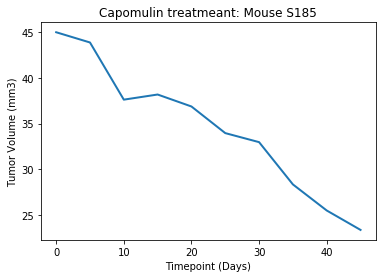

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
cap_mouse= cap_df.loc[cap_df['Mouse ID'] == 's185',:]
time_x = cap_mouse['Timepoint']
volume_y = cap_mouse['Tumor Volume (mm3)']


plt.title('Capomulin treatmeant: Mouse S185')
plt.plot(time_x , volume_y,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

cap_df 


AttributeError: module 'matplotlib.pyplot' has no attribute 'titl'

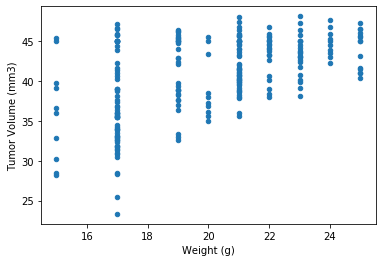

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_volume_weight = cap_df [['Weight (g)','Tumor Volume (mm3)']]
cap_volume_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.titl

## Correlation and Regression

The correlation between both factors is 0.53


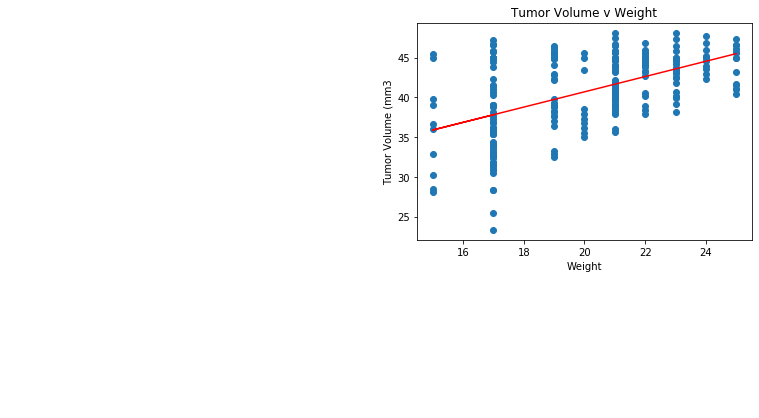

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
weight =cap_volume_weight['Weight (g)']
tumor_volume =cap_volume_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(weight,tumor_volume)
plt.scatter(weight,tumor_volume)
plt.plot(weight,regress_values,"r")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.title('Tumor Volume v Weight')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3')
print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.show()